# 変数設定

In [ ]:
client_id = "clb" #@param ["clb", "mkh"] {allow-input: true}

In [ ]:
from_date = "2020-12-21"

In [ ]:
to_date = "2020-12-31"

## [ユーザー辞書](http://taku910.github.io/mecab/dic.html)

In [ ]:
%%writefile /content/add_term.csv
ひのとり,,,1,名詞,一般,*,*,*,*,ひのとり,ヒノトリ,ヒノトリ
しあわせバター,,,1,名詞,一般,*,*,*,*,しあわせバター,シアワセバター,シアワセバター
しあわせバタ〜,,,1,名詞,一般,*,*,*,*,しあわせバタ〜,シアワセバタ〜,シアワセバタ〜
バタ〜,,,1,名詞,一般,*,*,*,*,バタ〜,バタ〜,バタ〜
ばたー,,,1,名詞,一般,*,*,*,*,ばたー,バター,バター
ポテチ,,,1,名詞,一般,*,*,*,*,ポテチ,ポテチ,ポテチ
ぽてち,,,1,名詞,一般,*,*,*,*,ぽてち,ポテチ,ポテチ
かるびー,,,1,名詞,一般,*,*,*,*,かるびー,カルビー,カルビー
ベジたべる,,,1,名詞,一般,*,*,*,*,ベジたべる,ベジタベル,ベジタベル
べじたべる,,,1,名詞,一般,*,*,*,*,べじたべる,ベジタベル,ベジタベル
ベジタベル,,,1,名詞,一般,*,*,*,*,ベジタベル,ベジタベル,ベジタベル
グランカルビー,,,1,名詞,一般,*,*,*,*,グランカルビー,グランカルビー,グランカルビー
GRAND Calbee,,,1,名詞,一般,*,*,*,*,GRAND Calbee,グランカルビー,グランカルビー
GRANDカルビー,,,1,名詞,一般,*,*,*,*,GRANDカルビー,グランカルビー,グランカルビー
グランCalbee,,,1,名詞,一般,*,*,*,*,グランCalbee,グランカルビー,グランカルビー

Writing /content/add_term.csv


# MeCab

In [ ]:
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp

In [ ]:
!pip install unidic-lite

     |████████████████████████████████| 47.3MB 98kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.7-cp36-none-any.whl size=47556594 sha256=38655033bbb5cf104e3e6838a114ae03c0c03430cc1b2aaa392a034f73cf0484
  Stored in directory: /root/.cache/pip/wheels/a8/82/7d/086724645e33a575aafd0b1dae2835c37d2c00c6a0a96ee3a0
Successfully built unidic-lite


In [ ]:
!echo "すもももももももものうち" | mecab

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
EOS


In [ ]:
import sys
import MeCab
m = MeCab.Tagger()
print(m.parse ("すもももももももものうち"))

すもも	スモモ	スモモ	李	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
の	ノ	ノ	の	助詞-格助詞			
うち	ウチ	ウチ	内	名詞-普通名詞-副詞可能			0
EOS



# mecab-ipadic-NEologd

In [ ]:
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :   

In [ ]:
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd" 

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [ ]:
!cat /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd

cat: /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd: Is a directory


In [ ]:
import MeCab
import subprocess

cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
m=MeCab.Tagger("-d {0}".format(path))


In [ ]:
print(m.parse("彼女はペンパイナッポーアッポーペンと恋ダンスを踊った。"))


彼女	名詞,代名詞,一般,*,*,*,彼女,カノジョ,カノジョ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
ペンパイナッポーアッポーペン	名詞,固有名詞,一般,*,*,*,Pen-Pineapple-Apple-Pen,ペンパイナッポーアッポーペン,ペンパイナッポーアッポーペン
と	助詞,並立助詞,*,*,*,*,と,ト,ト
恋ダンス	名詞,固有名詞,一般,*,*,*,恋ダンス,コイダンス,コイダンス
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
踊っ	動詞,自立,*,*,五段・ラ行,連用タ接続,踊る,オドッ,オドッ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。
EOS



# User Dictionary

In [ ]:
!sudo mkdir /usr/lib/x86_64-linux-gnu/mecab/dic/userdic

## ユーザー辞書作成

In [ ]:
%%bash
sudo /usr/lib/mecab/mecab-dict-index \
-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd \
-u /usr/lib/x86_64-linux-gnu/mecab/dic/userdic/user.dic \
-f utf-8 \
-t utf-8 \
add_term.csv


reading add_term.csv ... 15
emitting double-array: 100% |###########################################| 

done!


In [ ]:
!echo "ひのとり" | mecab -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/ -u /usr/lib/x86_64-linux-gnu/mecab/dic/userdic/user.dic

ひのとり	名詞,一般,*,*,*,*,ひのとり,ヒノトリ,ヒノトリ
EOS


In [ ]:
!echo "しあわせバター" | mecab -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/ -u /usr/lib/x86_64-linux-gnu/mecab/dic/userdic/user.dic

しあわせバター	名詞,一般,*,*,*,*,しあわせバター,シアワセバター,シアワセバター
EOS


## Provide your credentials to the runtime

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [ ]:
%load_ext google.colab.data_table

## クエリ実行

In [ ]:
project_id = 'bwing-230309'

In [ ]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df = client.query(f'''
SELECT
  quest_item_name,
FROM
  `bwing-230309.whatya.log_info`
WHERE
  client = '{client_id}'
  AND quest_item_name != ''
  AND quest_item_name NOT IN ('init', 'init_bot', 'init_op', 'LINKAGE-Newest')
  AND REGEXP_EXTRACT(quest_item_name, '(テスト)') IS NULL
  AND date BETWEEN '{from_date}' AND '{to_date}'
ORDER BY timestamp
''').to_dataframe()

In [ ]:
df.head(10)

,quest_item_name
0,お客様相談室・FAQ
1,TOP
2,キャンペーン・動画
3,商品
4,世界のカルビー商品
5,中国
6,TOP
7,商品
8,キャンペーン・動画
9,CM・動画


# WordCloud

## 日本語フォントのインストール

In [ ]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (5,788 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 146943 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

## ストップワード

In [ ]:
from six.moves import urllib

# ストップワードをダウンロード
url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
urllib.request.urlretrieve(url, 'stop_word.txt')

with open('stop_word.txt', 'r', encoding='utf-8') as file:
    stopwords = [word.replace('\n', '') for word in file.readlines()]


## わかち書き

In [ ]:
import MeCab
import re

def split_sentence(sentence, stopwords=()):
    m = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd -u /usr/lib/x86_64-linux-gnu/mecab/dic/userdic/user.dic')    
    node = m.parseToNode(sentence)
    words = []
    while node:
        word = node.surface
        feature = node.feature.split(',')
        if feature[0] == '名詞' and word not in stopwords and not re.match(r'[あ-ん]', word):
            words.append(word)
        node = node.next
    return words


In [ ]:
data=[]
for t in df['quest_item_name']:
    if t != []:
        data.extend(split_sentence(t, stopwords=stopwords))

In [ ]:
data

['FAQ',
 'TOP',
 'キャンペーン',
 '動画',
 '商品',
 '世界',
 'カルビー',
 '商品',
 '中国',
 'TOP',
 '商品',
 'キャンペーン',
 '動画',
 'CM',
 '動画',
 '商品',
 '商品情報',
 '商品',
 'TOP',
 'FAQ',
 '意見',
 '要望',
 '感想',
 'TOP',
 'ポテトチップス',
 '油',
 '動物性',
 '油',
 '人気',
 'ポテチ',
 '栄養',
 'メール',
 '問合せ',
 '商品',
 '商品情報',
 '商品',
 '意見',
 '要望',
 '感想',
 'ポテト',
 'デラックス',
 '普通',
 'ポテト',
 '…。',
 '同意',
 'ポテト',
 'デラックス',
 '普通',
 'ポテト',
 '…。',
 '商品',
 'TOP',
 'キャンペーン',
 '動画',
 'キャンペーン',
 'TOP',
 'コロナ',
 'ウィルス',
 'Virus',
 'TOP',
 'ショップ',
 'カルビー',
 '直営店',
 'グランカルビー',
 '乳',
 'アレルギー',
 '商品',
 '商品情報',
 'カテゴリ',
 'TOP',
 'FAQ',
 '質問',
 'カテゴリー',
 'チャットボット',
 'アレルギー',
 'アレルギー',
 '表示',
 '兼用',
 'ライン',
 'グルテンフリー',
 '商品',
 'FAQ',
 '質問',
 'カテゴリー',
 'チャットボット',
 '食べ方',
 '栄養',
 'フルグラ',
 '1',
 '食分',
 '量',
 '商品',
 '商品情報',
 '商品',
 '商品',
 '商品情報',
 '商品',
 'FAQ',
 '質問',
 'カテゴリー',
 'チャットボット',
 '食べ方',
 '栄養',
 '商品',
 '商品',
 '商品情報',
 'カテゴリ',
 'TOP',
 'FAQ',
 'FAQ',
 '質問',
 'カテゴリー',
 'チャットボット',
 '質問',
 'カテゴリー',
 'チャットボット',
 'パッケージ',
 '表示',
 'アレルギー',
 '表示',
 '兼用',
 'ライン',


## Word Cloud

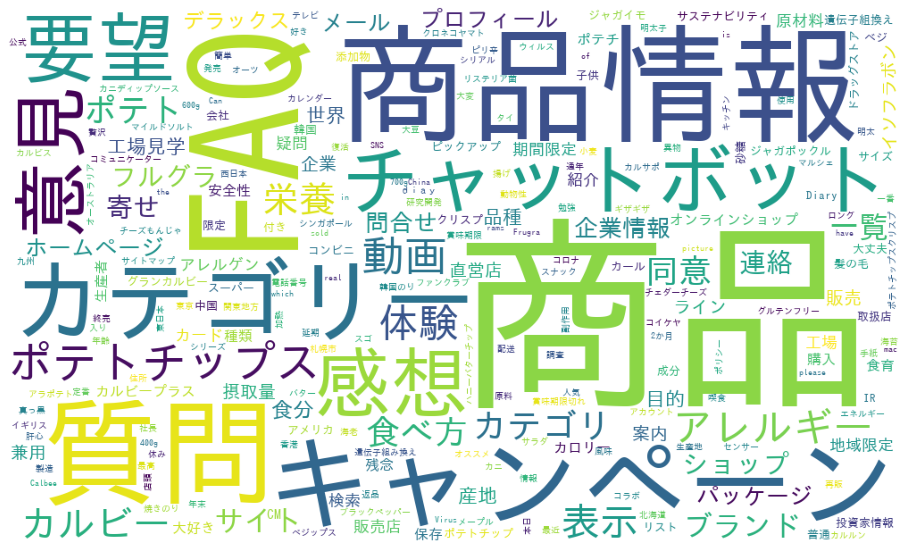

In [ ]:
import MeCab
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# リストを文字列に変換
word_chain = ' '.join(data)

stop_words = ['YES','NO','Yes','No','はい','いいえ','解決','未解決','是的','不是','チャット','スタッフ','相談','TOP','init','op']
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'  # 日本語フォント指定
 
wordcloud = WordCloud(
    font_path=fpath,
    width=1000, height=600,   # default width=400, height=200
    background_color="white",   # default=”black”
    stopwords=set(stop_words),
    max_words=600,   # default=200
    min_font_size=8,   #default=4
    collocations = False   #default = True
    ).generate(word_chain)
 
plt.figure(figsize=(16,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud.png")
plt.show()

## Word Counter

In [ ]:
from collections import Counter

# data = ['aaa', 'bbb', 'ccc', 'aaa', 'ddd']
counter = Counter(data)
for word, cnt in counter.most_common():
    if word not in stop_words:
        print(word, cnt)

商品 166
FAQ 79
商品情報 54
質問 44
キャンペーン 38
カテゴリー 32
チャットボット 32
意見 31
要望 31
感想 31
ポテトチップス 30
動画 28
アレルギー 25
体験 25
表示 23
カルビー 22
栄養 21
カテゴリ 19
食べ方 18
ポテト 17
同意 17
ブランド 13
サイト 13
一覧 13
味 13
ショップ 11
フルグラ 11
声 11
寄せ 11
連絡 11
量 10
問合せ 9
企業情報 9
メール 8
パッケージ 8
プロフィール 8
ホームページ 8
デラックス 7
1 7
食分 7
世界 6
産地 6
品種 6
目的 6
工場見学 6
直営店 5
兼用 5
ライン 5
イソフラボン 5
摂取量 5
企業 5
案内 5
販売 5
原材料 4
疑問 4
地域限定 4
販売店 4
検索 4
アレルゲン 4
期間限定 4
紹介 4
工場 4
カード 4
CM 3
ポテチ 3
安全性 3
カロリー 3
種類 3
オンラインショップ 3
残念 3
生産者 3
食育 3
カルビープラス 3
12 3
大好き 3
購入 3
袋 3
保存 3
ｇ 3
中国 2
油 2
普通 2
…。 2
グランカルビー 2
遺伝子組換え 2
変 2
物 2
Diary 2
子供 2
大丈夫 2
成分 2
韓国 2
サイズ 2
砂糖 2
アメリカ 2
髪の毛 2
コンビニ 2
カール 2
取扱店 2
ポテトチップ 2
添加物 2
ジャガポックル 2
会社 2
IR 2
投資家情報 2
ジャガイモ 2
ベジ 2
付き 2
リスト 2
限定 2
ピックアップ 2
サステナビリティ 2
25 2
ドラッグストア 2
クリスプ 2
スーパー 2
115 2
動物性 1
人気 1
コロナ 1
ウィルス 1
Virus 1
乳 1
グルテンフリー 1
年末 1
休み 1
原料 1
オーツ 1
シリアル 1
カルビス 1
最近 1
オススメ 1
東日本 1
西日本 1
返品 1
マイルドソルト 1
エネルギー 1
焼きのり 1
海苔 1
コラボ 1
大変 1
札幌市 1
ポテトチップスクリスプ 1
L 1
明太 1
チーズもんじゃ 1
チェダーチーズ 1
加熱 1
リステリア菌 1
ファンクラブ 1
カルサポ 1
テレビ 1
センサー 1


## 共起ペア

In [ ]:
# matplotlibを日本語表示に対応させるモジュール
!pip install japanize-matplotlib
import japanize_matplotlib
%matplotlib inline 

     |████████████████████████████████| 4.1MB 5.0MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120276 sha256=257d455691f2e550ca3099017bd110594ae5183e0fb0ee4669cc2436aa49ee49
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
data=[]
for t in df['quest_item_name']:
    if t != []:
        data.append(split_sentence(t, stopwords=stopwords))

In [ ]:
"""
夏目漱石の『こころ』から共起ネットワークを作成するPythonサンプルコード
コードの説明は以下のブログ
Pythonで共起ネットワークを作成する
https://irukanobox.blogspot.com/2019/10/python.html
『こころ』のテキスト（kokoro.txt）は、以下の青空文庫のサイトからダウンロードできるテキストからルビなどを取り除いたもの
https://www.aozora.gr.jp/cards/000148/card773.html
"""
import numpy as np
import re
from itertools import combinations, dropwhile
from collections import Counter, OrderedDict
import MeCab

import networkx as nx
from networkx.drawing import nx_agraph

# matplotlibのターミナル対応
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt

# 対象の品詞
TARGET_POS1 = ['名詞']

# 対象の詳細分類1
TARGET_POS2 = ['サ変接続', 'ナイ形容詞語幹', '形容動詞語幹', '一般', '固有名詞']

# ストップワード
STOP_WORDS = ['*']

def remove_blank(chapter):
    # 空白行と段落先頭の空白を削除

    lines = chapter.splitlines()

    # 空白行削除
    # 行頭の空白削除
    lines_cleaned = [l.strip() for l in lines if len(l) != 0]

    return '\n'.join(lines_cleaned)

def doc2chapter(doc):
    # 文章を章ごとに分割

    # タイトル削除
    doc = doc.replace('上　先生と私', '').replace('中　両親と私', '').replace('下　先生と遺書', '')

    # 章番号で章ごとに分割
    doc_split = re.split('[一二三四五六七八九十]{1,3}\n', doc)

    # 先頭は空白行なので削除
    del doc_split[0]

    print('Total chapter number: ', len(doc_split))

    chapter_l = list(map(remove_blank, doc_split))

    return chapter_l

def chapter2bform(chapter_l):
    # 章ごとに形態素解析して単語の原型のリストを作成

    m = MeCab.Tagger('-Ochasen')
    m.parse('')

    bform_2l = []
    for i, chapter in enumerate(chapter_l):
        node = m.parseToNode(chapter)

        bform_l = []
        while node:
            feature_split = node.feature.split(',')

            pos1 = feature_split[0]
            pos2 = feature_split[1]
            base_form = feature_split[6]

            if pos1 in TARGET_POS1 and pos2 in TARGET_POS2 and base_form not in STOP_WORDS:
                bform_l.append(base_form)

            node = node.next

        bform_2l.append(bform_l)

        print('Term number of chapter {}: '.format(i+1), len(bform_l))

    return bform_2l

def bform2pair(bform_2l, min_cnt=5):
    # 単語ペアの出現章数をカウント

    # 全単語ペアのリスト
    pair_all = []

    for bform_l in bform_2l:
        # 章ごとに単語ペアを作成
        # combinationsを使うと順番が違うだけのペアは重複しない
        # ただし、同単語のペアは存在しえるのでsetでユニークにする
        pair_l = list(combinations(set(bform_l), 2))

        # 単語ペアペアの順番をソート
        for i,pair in enumerate(pair_l):
            pair_l[i] = tuple(sorted(pair))

        pair_all += pair_l

    # 単語ペアごとの出現章数
    pair_count = Counter(pair_all)

    # ペア数がmin_cnt以上に限定
    for key, count in dropwhile(lambda key_count: key_count[1] >= min_cnt, pair_count.most_common()):
        del pair_count[key]

    return pair_count

def pair2jaccard(pair_count, bform_2l, edge_th=0.4):
    # jaccard係数を計算

    # 単語ごとの出現章数
    word_count = Counter()
    for bform_l in bform_2l:
        word_count += Counter(set(bform_l))

    # 単語ペアごとのjaccard係数を計算
    jaccard_coef = []
    for pair, cnt in pair_count.items():
        jaccard_coef.append(cnt / (word_count[pair[0]] + word_count[pair[1]] - cnt))

    # jaccard係数がedge_th未満の単語ペアを除外
    jaccard_dict = OrderedDict()
    for (pair, cnt), coef in zip(pair_count.items(), jaccard_coef):
        if coef >= edge_th:
            jaccard_dict[pair] = coef
            print(pair, cnt, coef, word_count[pair[0]], word_count[pair[1]], sep='\t')

    return jaccard_dict

def build_network(jaccard_dict):
    # 共起ネットワークを作成

    G = nx.Graph()

    #  接点／単語（node）の追加
    # ソートしないとネットワーク図の配置が実行ごとに変わる
    nodes = sorted(set([j for pair in jaccard_dict.keys() for j in pair]))
    G.add_nodes_from(nodes)

    print('Number of nodes=', G.number_of_nodes())

    #  線（edge）の追加
    for pair, coef in jaccard_dict.items():
        G.add_edge(pair[0], pair[1], weight=coef)

    print('Number of edges=', G.number_of_edges())

    plt.figure(figsize=(15, 15))

    # nodeの配置方法の指定
    seed = 0
    np.random.seed(seed)
    # k = node間反発係数
    #pos = nx.spring_layout(G, k=0.3, seed=seed)

    # できるだけnodeが重ならないようにする(Graphvizを使う)
    pos = nx_agraph.graphviz_layout(
        G,
        prog='neato',
        args='-Goverlap="scalexy" -Gsep="+6" -Gnodesep=0.8 -Gsplines="polyline" -GpackMode="graph" -Gstart={}'.format(seed))

    # nodeの大きさと色をページランクアルゴリズムによる重要度により変える
    pr = nx.pagerank(G)
    nx.draw_networkx_nodes(
        G,
        pos,
        node_color=list(pr.values()),
        cmap=plt.cm.rainbow,
        alpha=0.7,
        node_size=[100000*v for v in pr.values()])

    # 日本語ラベルの設定
    nx.draw_networkx_labels(G, pos, font_size=15, font_family='IPAexGothic', font_weight='bold')

    # エッジ太さをJaccard係数により変える
    edge_width = [d['weight'] * 8 for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.7, edge_color='darkgrey', width=edge_width)

    plt.axis('off')
    plt.tight_layout()

    plt.savefig('co-occurance.png', bbox_inches='tight')

In [ ]:
# Jaccard係数の計算
pair_count = bform2pair(data, min_cnt=5)
jaccard_dict = pair2jaccard(pair_count, data, edge_th=0.4)


('キャンペーン', '動画')	25	0.6097560975609756	38	28
('意見', '要望')	31	1.0	31	31
('感想', '要望')	31	1.0	31	31
('意見', '感想')	31	1.0	31	31
('メール', '問合せ')	8	0.8888888888888888	8	9
('デラックス', 'ポテト')	7	0.5	7	14
('チャットボット', '質問')	32	0.7272727272727273	32	44
('カテゴリー', '質問')	32	0.7272727272727273	32	44
('カテゴリー', 'チャットボット')	32	1.0	32	32
('ライン', '兼用')	5	1.0	5	5
('アレルギー', '表示')	15	0.45454545454545453	25	23
('栄養', '食べ方')	18	0.8571428571428571	21	18
('フルグラ', '食分')	7	0.6363636363636364	11	7
('量', '食分')	7	0.7	10	7
('1', '食分')	7	1.0	7	7
('フルグラ', '量')	9	0.75	11	10
('1', 'フルグラ')	7	0.6363636363636364	7	11
('1', '量')	7	0.7	7	10
('イソフラボン', '摂取量')	5	1.0	5	5
('チャット', '声')	11	1.0	11	11
('声', '寄せ')	11	1.0	11	11
('チャット', '寄せ')	11	1.0	11	11
('ブランド', '一覧')	13	1.0	13	13
('サイト', 'ブランド')	13	1.0	13	13
('サイト', '一覧')	13	1.0	13	13
('ホームページ', '目的')	6	0.75	8	6
('企業', '案内')	5	1.0	5	5


In [ ]:
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!dot -V

dot - graphviz version 2.40.1 (20161225.0304)


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 16 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

Number of nodes= 34
Number of edges= 27


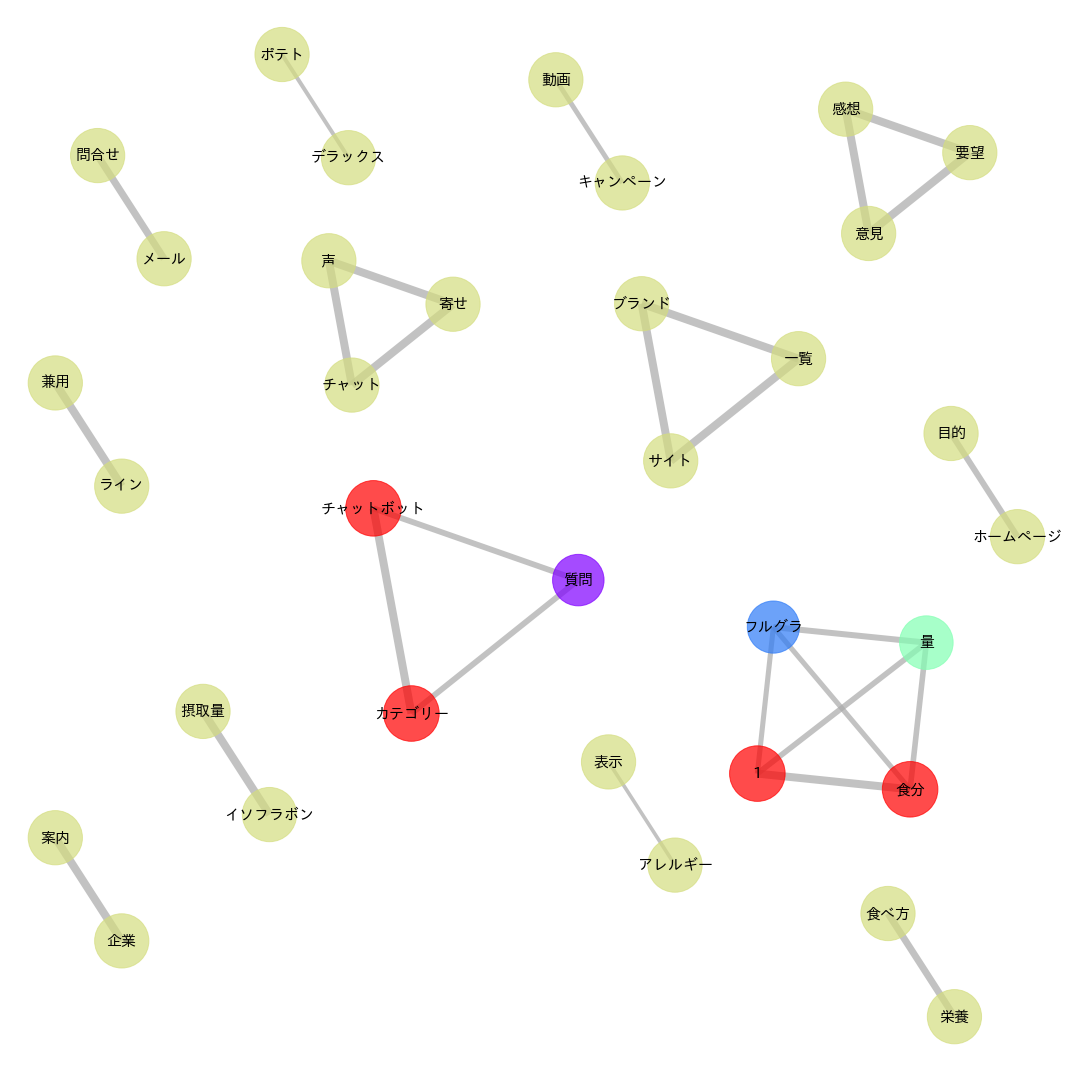

In [ ]:
# 共起ネットワーク作成
build_network(jaccard_dict)